# Proyecto Ciencia de datos en Python
##### Import de las librerias necesarias

In [245]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

##### Carga de datos de proyecto_training_data.npy

In [246]:
dataSet = np.load('proyecto_data/proyecto_training_data.npy')

##### Repartir el set de datos

In [247]:
#80% del set
trainingSet = dataSet[:int(len(dataset)*0.8)]
#20% del set
testSet = dataSet[len(trainingSet):]
len(dataset)==(len(trainingSet) + len(testSet))

True

## Analisis exploratorio
### Setup

In [248]:
means = np.nanmean(dataSet,axis=0)
maxs = np.nanmax(dataSet,axis=0)
mins = np.nanmin(dataSet,axis=0)
ranges = maxs - mins
stdDevs = np.nanstd(dataSet,axis=0)
def printVariableInfo(index):
    sb.distplot(dataSet[:,index])
    plt.show()

    print("media: " + str(means[index]))
    print("valor maximo: " + str(maxs[index]))
    print("valor minimo: " + str(mins[index]))
    print("rango, peak to peak: " + str(ranges[index]))
    print("desviacion estandar:  " + str(stdDevs[index]))
    
def visualCorr(x,y,xlabel,ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.scatter(x=x, y=y)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title('Correlation: ' + str(np.corrcoef(x,y)[1,0]))

    plt.show()

### SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

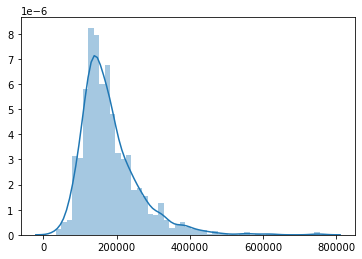

media: 180921.19589041095
valor maximo: 755000.0
valor minimo: 34900.0
rango, peak to peak: 720100.0
desviacion estandar:  79415.29188606751


In [249]:
printVariableInfo(0)

### OverallQual: Overall material and finish quality, rates the overall material and finish of the house

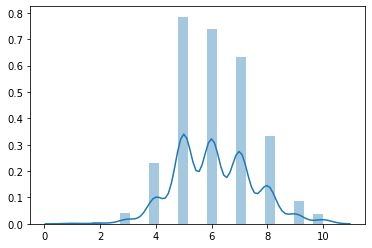

media: 6.0993150684931505
valor maximo: 10.0
valor minimo: 1.0
rango, peak to peak: 9.0
desviacion estandar:  1.3825228366585953


In [250]:
printVariableInfo(1)

### 1stFlrSF: First Floor square feet

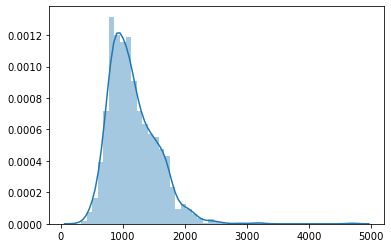

media: 1162.626712328767
valor maximo: 4692.0
valor minimo: 334.0
rango, peak to peak: 4358.0
desviacion estandar:  386.45532230228963


In [251]:
printVariableInfo(2)

### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

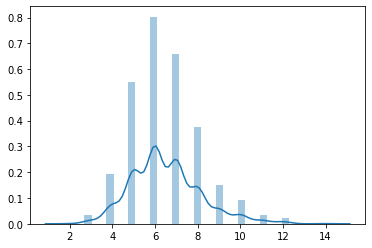

media: 6.517808219178082
valor maximo: 14.0
valor minimo: 2.0
rango, peak to peak: 12.0
desviacion estandar:  1.624836553698191


In [252]:
printVariableInfo(3)

### YearBuilt: Original construction date

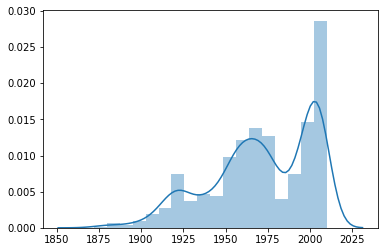

media: 1971.267808219178
valor maximo: 2010.0
valor minimo: 1872.0
rango, peak to peak: 138.0
desviacion estandar:  30.192558810489448


In [253]:
printVariableInfo(4)

### LotFrontage: Linear feet of street connected to property

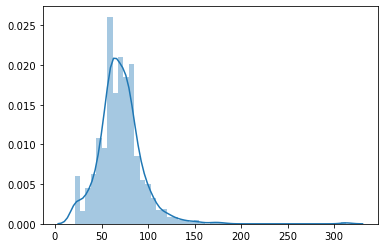

media: 70.04995836802665
valor maximo: 313.0
valor minimo: 21.0
rango, peak to peak: 292.0
desviacion estandar:  24.27463944767604


In [254]:
printVariableInfo(5)

### Visualizacion SalePrice vs OverallQual

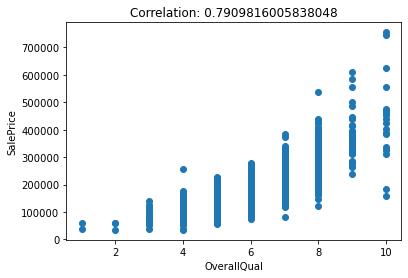

In [266]:
cSalePrice = dataSet[:,0]
cOverallQual = dataSet[:,1]
visualCorr(cOverallQual,cSalePrice,'OverallQual','SalePrice')

### Visualizacion SalePrice vs 1stFlrSF

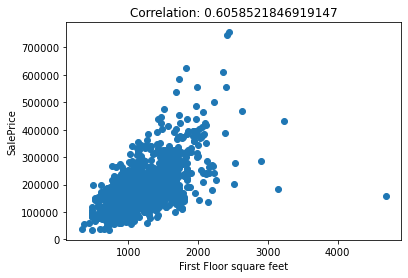

In [267]:
c1stFlrSF = dataSet[:,2]
visualCorr(c1stFlrSF,cSalePrice,'First Floor square feet','SalePrice')

### Visualizacion SalePrice vs TotRmsAbvGrd

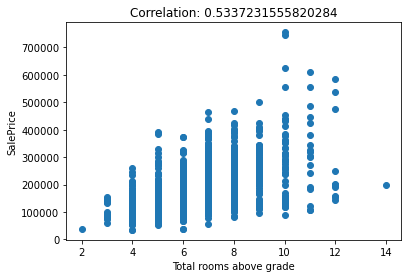

In [268]:
cTotRmsAbvGrd = dataSet[:,3]
visualCorr(cTotRmsAbvGrd,cSalePrice,'Total rooms above grade','SalePrice')

### Visualizacion SalePrice vs YearBuilt

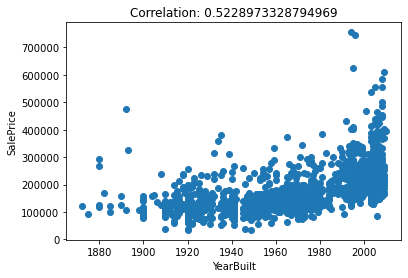

In [269]:
cYearBuilt = dataSet[:,4]
visualCorr(cYearBuilt,cSalePrice,'YearBuilt','SalePrice')

### Visualizacion SalePrice vs LotFrontage

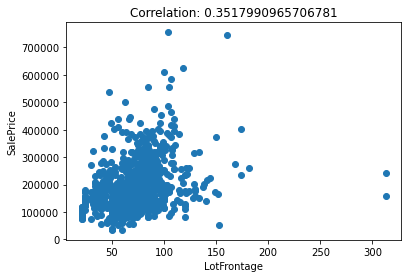

In [272]:
cLotFrontage = dataSet[:,5]
visualCorr(cLotFrontage[~np.isnan(cLotFrontage)],cSalePrice[~np.isnan(cLotFrontage)],'LotFrontage','SalePrice')

### Eleccion:
Se eligieron las dos variables con mayor correlacion a SalePrice
* SalePrice vs OverallQual
* SalePrice vs 1stFlrSF

## Funcion para entrenar modelo lineal

In [335]:
'''
Funcion que crea un modelo para y = mx +b
* vector con la variable independiente “x” ,
* vector con la variable dependiente “y”,
* un entero “epochs” que indica por cuantas iteraciones entrenar el modelo.
* un entero “imprimir_error_cada” , que nos indica cada cuantas iteraciones
* escalar lr(learning rate)
'''
def entrenarModeloLineal(x,y,epochs,imprimir_error_cada, lr,m=1,b=0):
    #Matriz de dos columnas con unos
    x2 = np.transpose(np.vstack((x,np.ones(len(x)))))
    for i in range(1, epochs + 1):
        consVector = np.array([[m],[b]])

        y_hat = np.matmul(x2,consVector)
        error = (0.5*np.sum(np.power(y-y_hat,2)))/len(y_hat)
        tempy_hat = y_hat - y.reshape((len(y),1))
        tempMatrix = np.vstack((x,np.ones(len(x))))
        
        gradient = np.matmul(tempMatrix,tempy_hat)/len(y_hat)
        m = m - lr * gradient[0][0]
        b = b - lr * gradient[1][0]
        if ((i%imprimir_error_cada)==0):
            print("["+str(i)+"] error: " + str(error))
    print("m: "+str(m)+", b: "+str(b))
        


entrenarModeloLineal(cOverallQual,cSalePrice,40,5, 0.5)
entrenarModeloLineal(c1stFlrSF,cSalePrice,40,5, 0.5)

[5] error: 4.547510350855856e+23
[10] error: 2.836400931472137e+36
[15] error: 1.769135391524513e+49
[20] error: 1.1034547333622253e+62
[25] error: 6.882527783982965e+74
[30] error: 4.292807603712346e+87
[35] error: 2.6775332698803998e+100
[40] error: 1.6700455909360095e+113
m: -4.4935330180967534e+55, b: -7.015809040046047e+54
[5] error: 2.5325878192371042e+60
[10] error: 1.4361800184706769e+119
[15] error: 8.144290317544665e+177
[20] error: 4.6184645325370255e+236
[25] error: 2.619039082184019e+295


<ipython-input-335-36919aca17c8>:16: RuntimeWarning: overflow encountered in power
  error = (0.5*np.sum(np.power(y-y_hat,2)))/len(y_hat)


[30] error: inf
[35] error: inf
[40] error: inf
m: -1.5669058786835219e+237, b: -1.2136360975555279e+234
